# Feature Engineering
# Klassifikation
# Regression
## Einleitung
## Klassische Methoden 
## ML Methoden
## Vergleich über alle Modelle

In [2]:
## preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

datapath = '../3_data'
from os import chdir; chdir(datapath)

from bfh_cas_pml import prep_data, prep_demo_data
X_train, X_test, y_train, y_test = prep_data('melb_data_prep.csv', 'Price', seed = 1234)

In [3]:
## import classes & functions
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from catboost import CatBoostRegressor
from lightgbm.sklearn import LGBMRegressor

from sklearn.metrics import r2_score, mean_squared_error
import time

In [4]:
## define models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(max_depth=8),
    RandomForestRegressor(random_state = 1234),
    AdaBoostRegressor(DecisionTreeRegressor(max_depth=15), learning_rate=0.07),
    GradientBoostingRegressor(),
    HistGradientBoostingRegressor(),
    CatBoostRegressor(logging_level='Silent'),
    LGBMRegressor()
]

In [5]:
## for collection of results
names = []
scores = []
used_times = []

In [6]:
## print output header
print('Regressor                        r2         time')
print('=================================================')

## iteration over all defined models
for model in models:
    start_time = time.time()        ## start timer
    model.fit(X_train, y_train)     ## train
    y_pred = model.predict(X_test)  ## predict
    name = model.__class__.__name__ ## pick model name (f. Output)
    score = r2_score(y_test, y_pred)             ## calculate r2
    used_time = time.time() - start_time    ## stop timer
    names.append(name)
    scores.append(score)
    used_times.append(used_time)
    print('%-30s   %0.4f    %6.3f' %(name, score, used_time)) ## console output  

Regressor                        r2         time
LinearRegression                 0.5601     0.073
Ridge                            0.5601     0.032
Lasso                            0.5601     0.067


C:\Users\werne\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\werne\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


KNeighborsRegressor              0.4493     0.819
DecisionTreeRegressor            0.6736     0.187
RandomForestRegressor            0.7779    22.560
AdaBoostRegressor                0.7637    12.270
GradientBoostingRegressor        0.7250     4.984
HistGradientBoostingRegressor    0.7821     1.210
CatBoostRegressor                0.8003     9.028
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003795 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1630
[LightGBM] [Info] Number of data points in the train set: 12262, number of used features: 23
[LightGBM] [Info] Start training from score 1055902.695237
LGBMRegressor                    0.7882     0.400


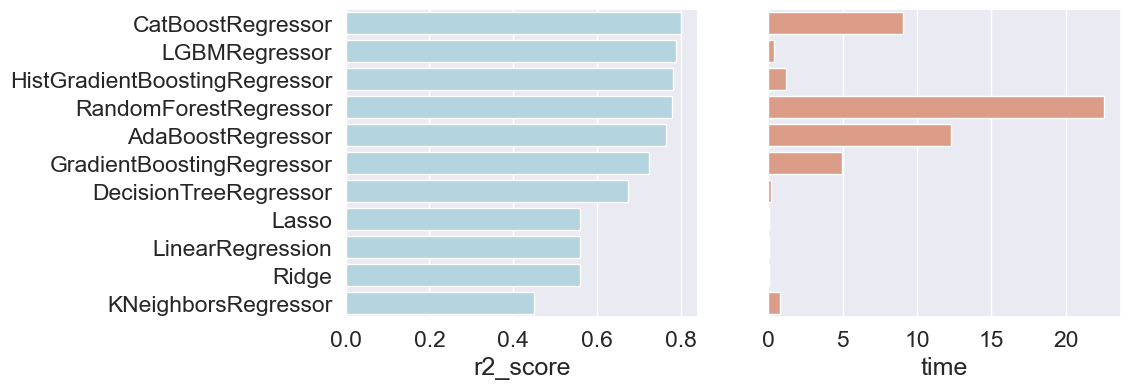

In [7]:
## vizualisation, ordered by decreasing accuracy

results = pd.DataFrame({
    'models' : names,
    'scores' : scores,
    'used_times' : used_times}
).sort_values(by='scores', ascending=False)
#print(results)

order = results.sort_values('scores', ascending=False).models

sns.set(font_scale=1.5) 
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=False)

ax = sns.barplot(data=results, x=scores, y=names, color='lightblue', order=order, ax=axes[0])
ax.set_xlabel('r2_score')
#ax.set(xlim=(0.5, 1))

ax = sns.barplot(x=used_times, y=names, color='darksalmon', order=order, ax=axes[1])
ax.set_xlabel('time')
ax.set_yticklabels('')
ax.set_ylabel('');

In [8]:
## show results of best regressor
print('best_regressor :', names[scores.index(max(scores))])
print('best_score     : %0.4f' % (max(scores)))
print('best_time      : %6.4f' % (used_times[scores.index(max(scores))]))

best_regressor : CatBoostRegressor
best_score     : 0.8003
best_time      : 9.0276


In [9]:
## top 3!!
print(pd.DataFrame({
    'names'  : names,
    'scores' : scores
}).sort_values(by='scores', ascending=False).head(3))

                            names    scores
9               CatBoostRegressor  0.800349
10                  LGBMRegressor  0.788166
8   HistGradientBoostingRegressor  0.782070


**Fazit:**  vgl. Präsentation